Tahan pertama

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/onlinefoods.csv')
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [3]:
# Meninjau informasi umum tentang dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         388 non-null    int64  
 1   Gender                      388 non-null    object 
 2   Marital Status              388 non-null    object 
 3   Occupation                  388 non-null    object 
 4   Monthly Income              388 non-null    object 
 5   Educational Qualifications  388 non-null    object 
 6   Family size                 388 non-null    int64  
 7   latitude                    388 non-null    float64
 8   longitude                   388 non-null    float64
 9   Pin code                    388 non-null    int64  
 10  Output                      388 non-null    object 
 11  Feedback                    388 non-null    object 
 12  Unnamed: 12                 388 non-null    object 
dtypes: float64(2), int64(3), object(8)


In [4]:
# Mendapatkan ringkasan statistik untuk variabel numerik
print(df.describe())

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000


In [5]:
# Menghitung missing values
print(df.isnull().sum())

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


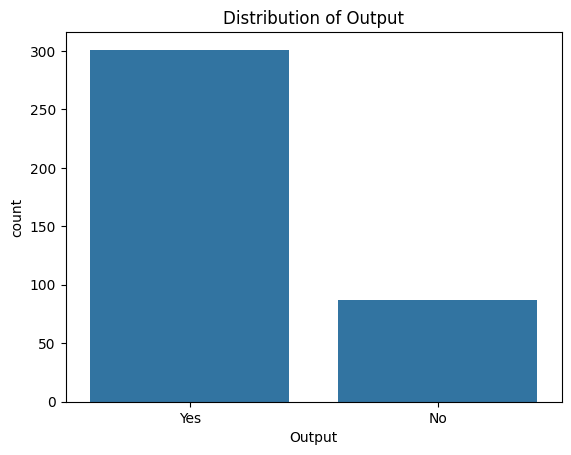

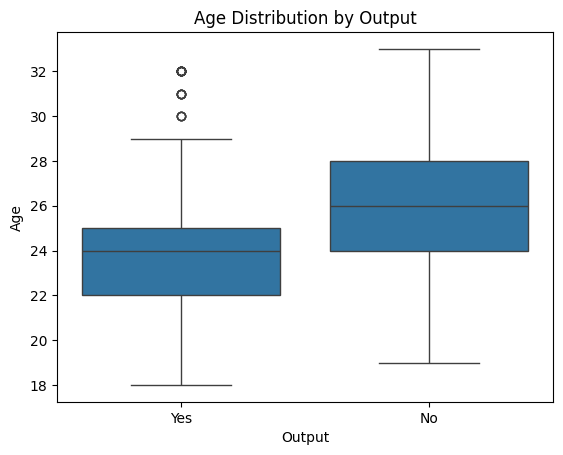

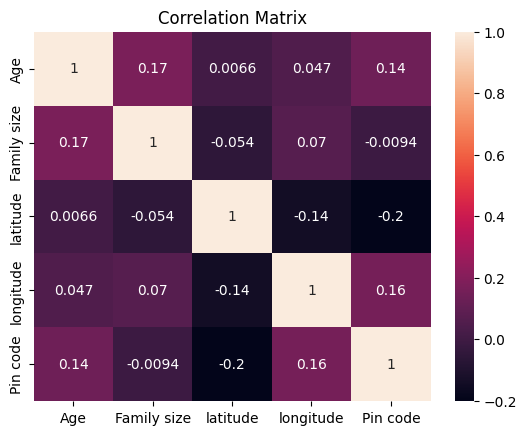

In [6]:
# Visualize some key features
sns.countplot(x='Output', data=df)
plt.title('Distribution of Output')
plt.show()

sns.boxplot(x='Output', y='Age', data=df)
plt.title('Age Distribution by Output')
plt.show()

# Select only numeric columns for correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
sns.heatmap(df[numeric_columns].corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

Tahap kedua

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Handling missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Encoding categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Splitting the dataset into training and testing sets
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Tahap ketiga

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [9]:
# Contoh data (ganti dengan data Anda)
# X_train, X_test, y_train, y_test
#Encode target labels with value between 0 and n_classes-1
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [10]:
#Initialize Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)

#Train the model
logreg_model.fit(X_train, y_train_encoded)

#Predict on test set
y_pred_encoded = logreg_model.predict(X_test)

In [11]:
#Calculate evaluation metrics
mae = mean_absolute_error(y_test_encoded, y_pred_encoded)
mse = mean_squared_error(y_test_encoded, y_pred_encoded)
rmse = math.sqrt(mse)
r2 = r2_score(y_test_encoded, y_pred_encoded)

In [12]:
#Print evaluation metrics
print('Logistic Regression Metrics =')
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R²): {r2:.2f}\n')

Logistic Regression Metrics =
Mean Absolute Error (MAE): 0.13
Mean Squared Error (MSE): 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²): 0.02



In [13]:
#Define models
models = {
    'Logistic Regression' : logreg_model.fit(X_train, y_train_encoded),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [14]:
# Train and evaluate models using cross-validation
results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_scores
    print(f'{name} Cross-Validation Accuracy: {cv_scores.mean():.2f} (+/- {cv_scores.std():.2f})')

Logistic Regression Cross-Validation Accuracy: 0.87 (+/- 0.04)
Random Forest Cross-Validation Accuracy: 0.90 (+/- 0.04)
Decision Tree Cross-Validation Accuracy: 0.88 (+/- 0.04)


In [15]:
#Initialize models
models = {
    '\n Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

In [16]:
#Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))



 Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77      0.79        78
weighted avg       0.89      0.90      0.89        78

Decision Tree Accuracy: 0.88
              precision    recall  f1-score   support

          No       0.60      0.75      0.67        12
         Yes       0.95      0.91      0.93        66

    accuracy                           0.88        78
   macro avg       0.78      0.83      0.80        78
weighted avg       0.90      0.88      0.89        78



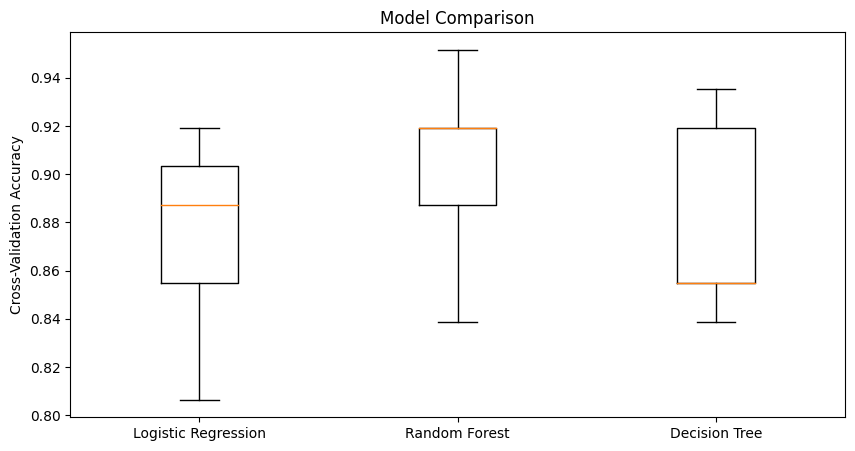

In [17]:
#Plot model performance
plt.figure(figsize=(10, 5))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Model Comparison')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [18]:
#Train the best model
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [19]:
#Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best Model = Random Forest \nRandom Forest Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))

Best Model = Random Forest 
Random Forest Accuracy: 0.90
              precision    recall  f1-score   support

          No       0.70      0.58      0.64        12
         Yes       0.93      0.95      0.94        66

    accuracy                           0.90        78
   macro avg       0.81      0.77      0.79        78
weighted avg       0.89      0.90      0.89        78



In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import joblib

In [21]:
df = pd.read_csv('/content/onlinefoods.csv')
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


In [22]:
# Handle missing values
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

# Encode categorical variables
categorical_features = ['Gender', 'Marital Status', 'Occupation', 'Monthly Income', 'Educational Qualifications', 'Feedback']
numerical_features = ['Age', 'Family size', 'latitude', 'longitude']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

In [23]:
# Split the dataset
X = df.drop('Output', axis=1)
y = df['Output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00


In [26]:
# Save model and preprocessor
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')

import streamlit as st
import pandas as pd
import numpy as np
import joblib

In [27]:
# Load model and preprocessor
model = joblib.load('random_forest_model.pkl')
preprocessor = joblib.load('preprocessor.pkl')

In [28]:
# Input form for user
st.title('Prediksi Output untuk Online Foods')

2024-07-25 18:01:13.292 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

In [29]:
# Input features
gender = st.selectbox('Gender', ['Male', 'Female'])
marital_status = st.selectbox('Marital Status', ['Single', 'Married', 'Prefer not to say'])
occupation = st.selectbox('Occupation', ['Employee', 'House wife', 'Self Employeed', 'Student'])
monthly_income = st.selectbox('Monthly Income', ['Below Rs.10000', '10001 to 25000', '25001 to 50000', 'More than 50000', 'No Income'])
educational_qualifications = st.selectbox('Educational Qualifications', ['School', 'Graduate', 'Post Graduate', 'Ph.D', 'Uneducated'])
feedback = st.selectbox('Feedback', ['Positive', 'Negative'])
age = st.number_input('Age', min_value=0)
family_size = st.number_input('Family Size', min_value=0)
latitude = st.number_input('Latitude')
longitude = st.number_input('Longitude')

2024-07-25 18:01:19.290 Session state does not function when running a script without `streamlit run`


In [30]:
# Create DataFrame from inputs
user_input = pd.DataFrame({
    'Gender': [gender],
    'Marital Status': [marital_status],
    'Occupation': [occupation],
    'Monthly Income': [monthly_income],
    'Educational Qualifications': [educational_qualifications],
    'Feedback': [feedback],
    'Age': [age],
    'Family size': [family_size],
    'latitude': [latitude],
    'longitude': [longitude]
})


In [31]:
# Button to make prediction
if st.button('Predict'):
    try:
        # Apply preprocessing
        user_input_processed = preprocessor.transform(user_input)

        # Make prediction
        prediction = model.predict(user_input_processed)
        prediction_proba = model.predict_proba(user_input_processed)

        # Display prediction
        st.write('### Hasil Prediksi')
        st.write(f'Output Prediksi: {prediction[0]}')
        st.write(f'Probabilitas Prediksi: {prediction_proba[0]}')
    except ValueError as e:
        st.error(f"Error during preprocessing: {e}")
    except Exception as e:
        st.error(f"Terjadi kesalahan: {e}")